# Future Price Time Series Model Wards 7 & 8

In [1]:
# ResidentialSalesWithLocation_CSV

setwd("D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report")  #set my working directory
getwd()

HOUSE.df <- read.csv("ResidentialSalesWithLocation_CSV.csv", header = TRUE)  #import data into R

######################### Verify the data ##########################
head(HOUSE.df)   #Verify the first five rows of the dataframe

tail(HOUSE.df)   #Verify the last five rows of the dataframe

summary(HOUSE.df)   #To check the variables and counts

str(HOUSE.df)   #To check the data structure of the loaded dataset
####################################################################

[1] "D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report"

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,0150 0275,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407639,Old City 2,Ward 1,38.91745,-77.04023,5
2,0150 0276,1,0,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407640,Old City 2,Ward 1,38.91745,-77.04017,1
3,0150 0277,1,0,13,Hot Water Rad,N,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407641,Old City 2,Ward 1,38.91745,-77.04012,1
4,0150 0278,2,1,7,Warm Cool,Y,1,6,2,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407642,Old City 2,Ward 1,38.91745,-77.04006,5
5,0150 0279,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407643,Old City 2,Ward 1,38.91745,-77.04000,1
6,0150 0280,1,1,7,Warm Cool,Y,1,6,3,1910,⋯,1,11,960,2022/08/31 05:17:11+00,74407644,Old City 2,Ward 1,38.91745,-77.03995,1


,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
108398,PAR 01550236,2,0,13,Hot Water Rad,N,1,6,2,1934,⋯,1,12,4571,2022/08/31 05:17:11+00,74624612,Woodridge,Ward 5,38.92890,-76.97456,1
108399,PAR 01550251,2,0,1,Forced Air,Y,1,6,3,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624613,Woodridge,Ward 5,38.92700,-76.97157,4
108400,PAR 01550252,1,0,13,Hot Water Rad,N,1,5,2,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624614,Woodridge,Ward 5,38.92706,-76.97145,1
108401,PAR 01550254,3,0,13,Hot Water Rad,N,1,5,3,1922,⋯,0,12,7829,2022/08/31 05:17:11+00,74624615,Woodridge,Ward 5,38.92790,-76.97388,2
108402,PAR 01550255,3,1,1,Forced Air,Y,1,10,4,1925,⋯,0,13,4001,2022/08/31 05:17:11+00,74624616,Woodridge,Ward 5,38.92924,-76.97320,4
108403,PAR 01550259,1,0,13,Hot Water Rad,N,1,6,3,1940,⋯,0,11,1399,2022/08/31 05:17:11+00,74624617,Woodridge,Ward 5,38.92924,-76.97465,1


     SSL                BATHRM         HF_BATHRM            HEAT      
 Length:108403      Min.   : 0.000   Min.   : 0.0000   Min.   : 0.00  
 Class :character   1st Qu.: 1.000   1st Qu.: 0.0000   1st Qu.: 1.00  
 Mode  :character   Median : 2.000   Median : 1.0000   Median : 7.00  
                    Mean   : 2.124   Mean   : 0.6298   Mean   : 7.27  
                    3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:13.00  
                    Max.   :30.000   Max.   :12.0000   Max.   :13.00  
                    NA's   :1371     NA's   :1371      NA's   :1371   
    HEAT_D               AC              NUM_UNITS          ROOMS        
 Length:108403      Length:108403      Min.   : 0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:  6.000  
 Mode  :character   Mode  :character   Median : 1.000   Median :  7.000  
                                       Mean   : 1.196   Mean   :  7.397  
                                       3rd Qu.: 1.000   3rd Qu

'data.frame':	108403 obs. of  44 variables:
 $ SSL              : chr  "0150    0275" "0150    0276" "0150    0277" "0150    0278" ...
 $ BATHRM           : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM        : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT             : int  7 7 13 7 7 7 7 7 7 7 ...
 $ HEAT_D           : chr  "Warm Cool" "Warm Cool" "Hot Water Rad" "Warm Cool" ...
 $ AC               : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS            : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM            : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB              : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ YR_RMDL          : int  2004 NA NA 2016 NA NA 2001 NA 2003 2015 ...
 $ EYB              : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE         : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE     

In [2]:
################################################################################
# Create a new data set for the total population
# Three features, "SALEDATE", "PRICE", and "Ward"

HOUSE_TS1.df <- subset(HOUSE.df, select = c(SALEDATE, PRICE, WARD))

head(HOUSE_TS1.df)     #Verify the first five rows of the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts

str(HOUSE_TS1.df)   #To check the data structure of the loaded dataset
################################################################################

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013/07/22 00:00:00+00,755000,Ward 1
2,1900/01/01 00:00:00+00,NA,Ward 1
3,1996/02/12 00:00:00+00,118000,Ward 1
4,2022/04/06 00:00:00+00,1110000,Ward 1
5,2017/03/24 00:00:00+00,0,Ward 1
6,2000/06/30 00:00:00+00,251000,Ward 1


   SALEDATE             PRICE              WARD          
 Length:108403      Min.   :       0   Length:108403     
 Class :character   1st Qu.:       0   Class :character  
 Mode  :character   Median :  294000   Mode  :character  
                    Mean   :  465255                     
                    3rd Qu.:  715000                     
                    Max.   :25100000                     
                    NA's   :14181                        

'data.frame':	108403 obs. of  3 variables:
 $ SALEDATE: chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE   : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...
 $ WARD    : chr  "Ward 1" "Ward 1" "Ward 1" "Ward 1" ...


In [3]:
################################################################################
# Remove 0s and NA's from the "PRICE" variable
HOUSE_TS1.df[HOUSE_TS1.df==0] <- NA     # Set all 0s to NA

HOUSE_TS1.df <- na.omit(HOUSE_TS1.df)     # Removes all NA's from the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts
################################################################################

   SALEDATE             PRICE              WARD          
 Length:62008       Min.   :       1   Length:62008      
 Class :character   1st Qu.:  300000   Class :character  
 Mode  :character   Median :  557985   Mode  :character  
                    Mean   :  706961                     
                    3rd Qu.:  894000                     
                    Max.   :25100000                     

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




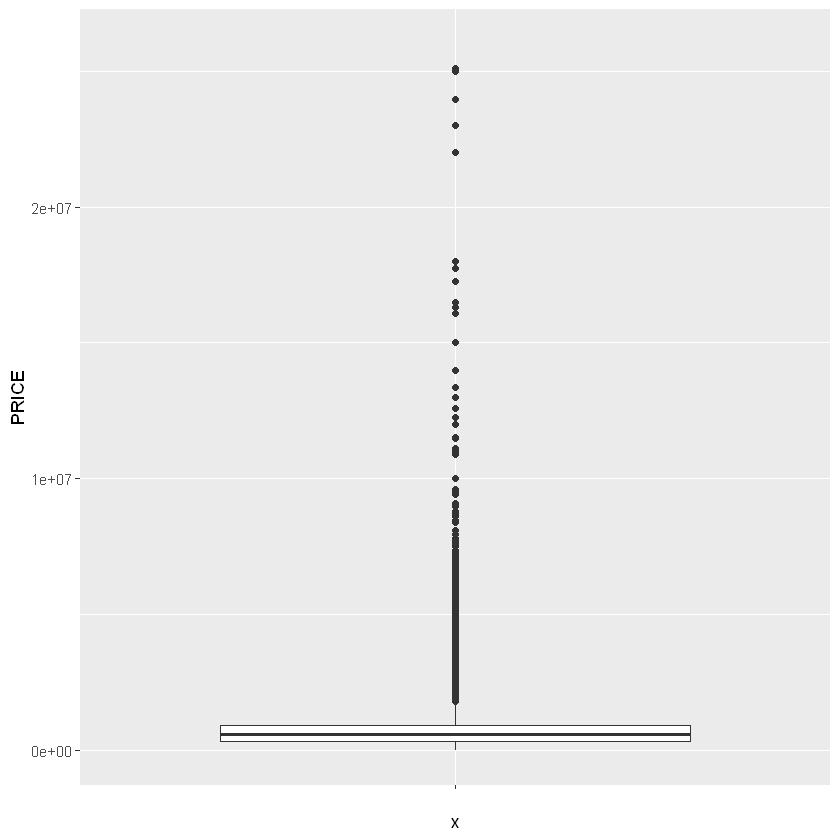

In [4]:
################################################################################
# Boxplot of the "PRICE" variable
# Install packages
install.packages("ggplot2")
install.packages("dplyr")
library("ggplot2")
library("dplyr")

# Create boxplot of the "PRICE" variable 
ggplot(data = HOUSE_TS1.df, aes(x = "", y = PRICE)) + 
  geom_boxplot() +
  coord_cartesian(ylim = c(0, 26000000)) # Set the y axis scale
################################################################################

In [5]:
################################################################################
# Install packages to work with dates
install.packages("lubridate")  # general package for handling and converting dates)
install.packages("linelist")   # has function to "guess" messy dates
install.packages("aweek")      # another option for converting dates to weeks, and weeks to dates
install.packages("zoo")        # additional date/time functions
install.packages("tidyverse")  # data management and visualization  
install.packages("rio")        # data import/export
library("lubridate")  
library("linelist")   
library("aweek")      
library("zoo")        
library("tidyverse")    
library("rio")   
################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'linelist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'aweek' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\zoo\libs\x64\zoo.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\zoo\libs\x64\zoo.dll: Permission denied"
Warning message:
"restored 'zoo'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [6]:
################################################################################
# Clean up Date attribute
class(HOUSE_TS1.df$SALEDATE)   #Check the class of the "SALEDATE" field

# Because "SALEDATE" is class 'character', we must convert it to class 'Date'
# Tell R how to identify the date parts of the "SALEDATE" field
# The format = argument specifies the date components and 
# drops the time component in the "SALEDATE'
HOUSE_TS1.df$SALEDATE <- as.Date(HOUSE_TS1.df$SALEDATE, format = "%Y/%m/%d")

head(HOUSE_TS1.df)   # Verify the time component was dropped

class(HOUSE_TS1.df$SALEDATE)   # Check the class of the "SALEDATE" field 

# Drop the 'day' from the date
HOUSE_TS2.df <- HOUSE_TS1.df
HOUSE_TS2.df$SALEDATE <- format(HOUSE_TS2.df$SALEDATE, format = "%Y-%m")

head(HOUSE_TS2.df)   # Verify the day component was dropped
################################################################################

[1] "character"

,SALEDATE,PRICE,WARD
,<date>,<int>,<chr>
1,2013-07-22,755000,Ward 1
3,1996-02-12,118000,Ward 1
4,2022-04-06,1110000,Ward 1
6,2000-06-30,251000,Ward 1
7,2021-11-22,930388,Ward 1
8,2006-02-06,606500,Ward 1


[1] "Date"

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013-07,755000,Ward 1
3,1996-02,118000,Ward 1
4,2022-04,1110000,Ward 1
6,2000-06,251000,Ward 1
7,2021-11,930388,Ward 1
8,2006-02,606500,Ward 1


In [7]:
################################################################################
# Filter database for only Wards 7 & 8

HOUSE_TS2.df <- subset(HOUSE_TS2.df, WARD %in% c("Ward 7", "Ward 8"))

summary(HOUSE_TS2.df)     #To check the variables and counts

str(HOUSE_TS2.df)   #To check the data structure

# Create a new data set for the Ward 1 &2 population
# Drop the Ward attribute and keep two features, "SALEDATE", "PRICE"

HOUSE_TS2.df <- subset(HOUSE_TS2.df, select = c(SALEDATE, PRICE))

head(HOUSE_TS2.df)     #Verify the first five rows of the dataframe

################################################################################

   SALEDATE             PRICE              WARD          
 Length:15131       Min.   :       1   Length:15131      
 Class :character   1st Qu.:  175000   Class :character  
 Mode  :character   Median :  299999   Mode  :character  
                    Mean   :  339256                     
                    3rd Qu.:  426305                     
                    Max.   :25100000                     

'data.frame':	15131 obs. of  3 variables:
 $ SALEDATE: chr  "2021-07" "2010-04" "2011-10" "2022-05" ...
 $ PRICE   : int  1285000 692325 775000 1495000 1175000 889535 1235000 801490 1160000 1075000 ...
 $ WARD    : chr  "Ward 8" "Ward 8" "Ward 8" "Ward 8" ...


,SALEDATE,PRICE
,<chr>,<int>
7253,2021-07,1285000
7256,2010-04,692325
7257,2011-10,775000
7258,2022-05,1495000
7259,2018-11,1175000
7260,2010-05,889535


In [8]:
################################################################################
# Calculate the mean "Price" by "SALEDATE" (year and month)
HOUSE_TS3.df <- HOUSE_TS2.df
HOUSE_TS3.df <- aggregate(PRICE~SALEDATE,HOUSE_TS2.df,mean)

summary(HOUSE_TS2.df)   #To check the variables and counts before the aggregation

summary(HOUSE_TS3.df)   #To check the variables and counts after the aggregation

head(HOUSE_TS3.df, 20)

tail(HOUSE_TS3.df, 20)

# Filter the dataframe for only sales after 2010-01
HOUSE_TS4.df <- HOUSE_TS3.df
HOUSE_TS4.df <- HOUSE_TS4.df %>% filter(SALEDATE > '2010-01')

summary(HOUSE_TS4.df)   #To check the variables and counts

str(HOUSE_TS4.df)   #To check the data structure   
################################################################################

   SALEDATE             PRICE         
 Length:15131       Min.   :       1  
 Class :character   1st Qu.:  175000  
 Mode  :character   Median :  299999  
                    Mean   :  339256  
                    3rd Qu.:  426305  
                    Max.   :25100000  

   SALEDATE             PRICE       
 Length:371         Min.   : 40000  
 Class :character   1st Qu.:106560  
 Mode  :character   Median :239434  
                    Mean   :245759  
                    3rd Qu.:317116  
                    Max.   :929861  

,SALEDATE,PRICE
,<chr>,<dbl>
1,1900-01,48000.00
2,1984-07,40000.00
3,1991-01,103000.00
4,1992-01,92911.10
5,1992-02,75375.00
6,1992-03,91500.00
7,1992-04,81860.00
8,1992-05,76500.00
9,1992-06,88667.31


,SALEDATE,PRICE
,<chr>,<dbl>
352,2021-01,501617.5
353,2021-02,561409.1
354,2021-03,539660.1
355,2021-04,531662.9
356,2021-05,535898.7
357,2021-06,544970.9
358,2021-07,547710.7
359,2021-08,526688.9
360,2021-09,499184.4


   SALEDATE             PRICE       
 Length:151         Min.   :196558  
 Class :character   1st Qu.:277117  
 Mode  :character   Median :354685  
                    Mean   :377152  
                    3rd Qu.:459092  
                    Max.   :929861  

'data.frame':	151 obs. of  2 variables:
 $ SALEDATE: chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ PRICE   : num  227580 236867 215447 274510 264669 ...


In [9]:
####################################################################
# Set time series (ts) for 'PRICE' variable

# Choose the 'PRICE' column and convert it to ts object

H_TS <- ts(HOUSE_TS4.df$PRICE, start=c(2010, 1), freq=12)

# Let us see the ts object

H_TS
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,227579.9,236867.3,215447.0,274509.7,264668.8,287032.1,254292.2,257695.7,251263.3,258728.8,234229.1,228019.0
2011,196557.9,218175.5,225231.7,203854.1,216609.6,276372.0,315408.1,231651.8,309349.7,243992.0,287136.6,239637.0
2012,278381.8,274386.1,258603.9,280632.2,335731.1,264808.9,271247.7,283715.7,367071.9,256451.2,250862.7,222279.3
2013,239090.6,239011.5,277682.9,314798.7,289556.3,301206.0,272600.7,273731.9,269652.4,235628.6,263496.0,263163.5
2014,281799.4,311751.5,291679.3,279770.0,303598.8,273017.0,493892.6,310330.4,397837.1,269873.8,300564.2,276550.6
2015,313561.4,318375.1,324501.2,375013.7,344090.6,325013.8,324772.5,341270.2,306736.2,390577.5,326894.0,309586.1
2016,297067.5,302020.2,324933.1,349008.3,369142.5,388758.7,375486.7,348578.8,344708.8,384366.3,363132.6,356506.6
2017,344501.9,649747.2,386165.8,400939.8,379102.1,374257.9,382158.6,337322.1,392298.8,413315.6,371135.1,404357.4
2018,929860.9,354685.4,721936.2,430100.2,418948.8,430884.5,439763.6,418574.1,424328.6,433660.3,459482.6,392723.7
2019,450698.9,426103.5,445154.7,438735.6,603511.4,508693.0,431153.3,402271.0,442771.9,477162.4,435154.8,458701.5


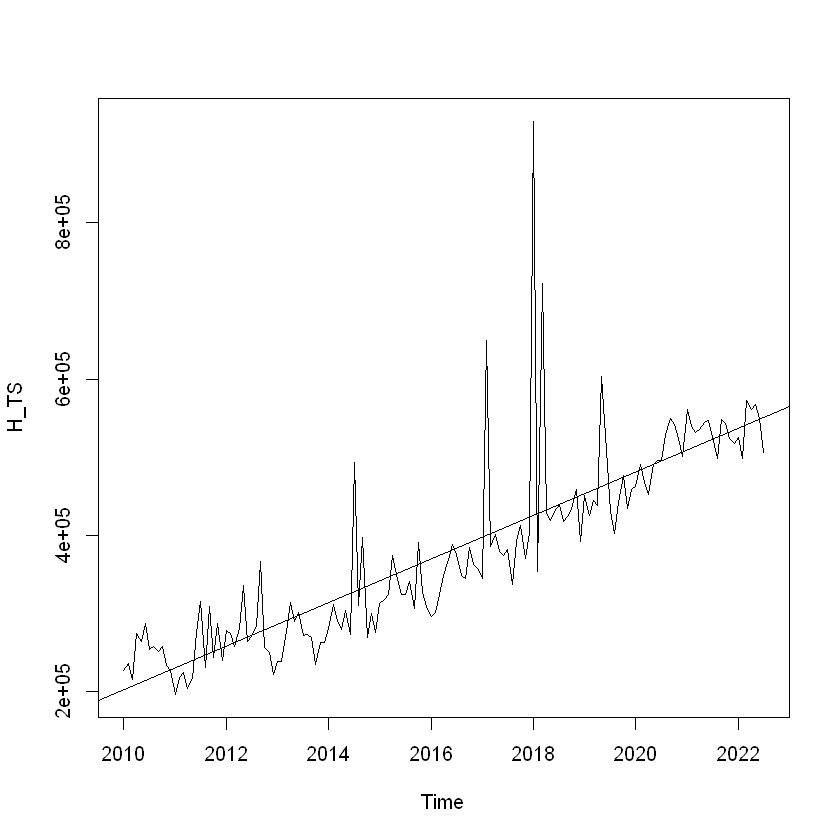

In [10]:
#####################################################################
# Let us fit a regression line on the dataset

plot(H_TS)

abline(reg=lm(H_TS~time(H_TS)))
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,7,8,9,10,11,12
2018,1,2,3,4,5,6,7,8,9,10,11,12
2019,1,2,3,4,5,6,7,8,9,10,11,12


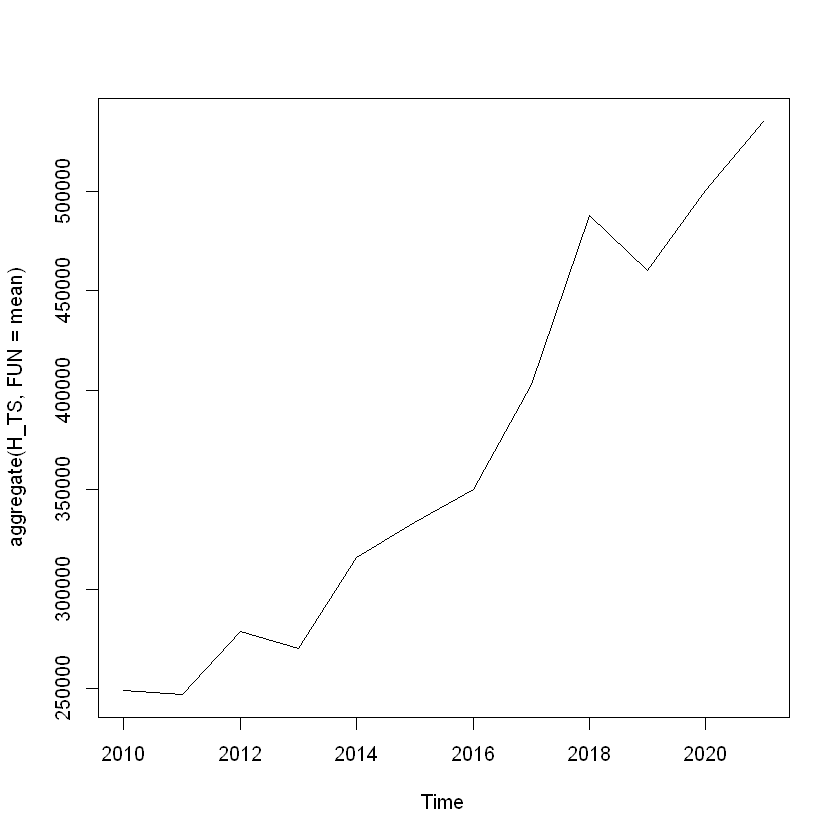

In [11]:
#####################################################################
# First let us plot the cycle and trend
# Aggregate the cycles and display a year-on-year trend

cycle(H_TS)

plot(aggregate(H_TS,FUN=mean))

#####################################################################

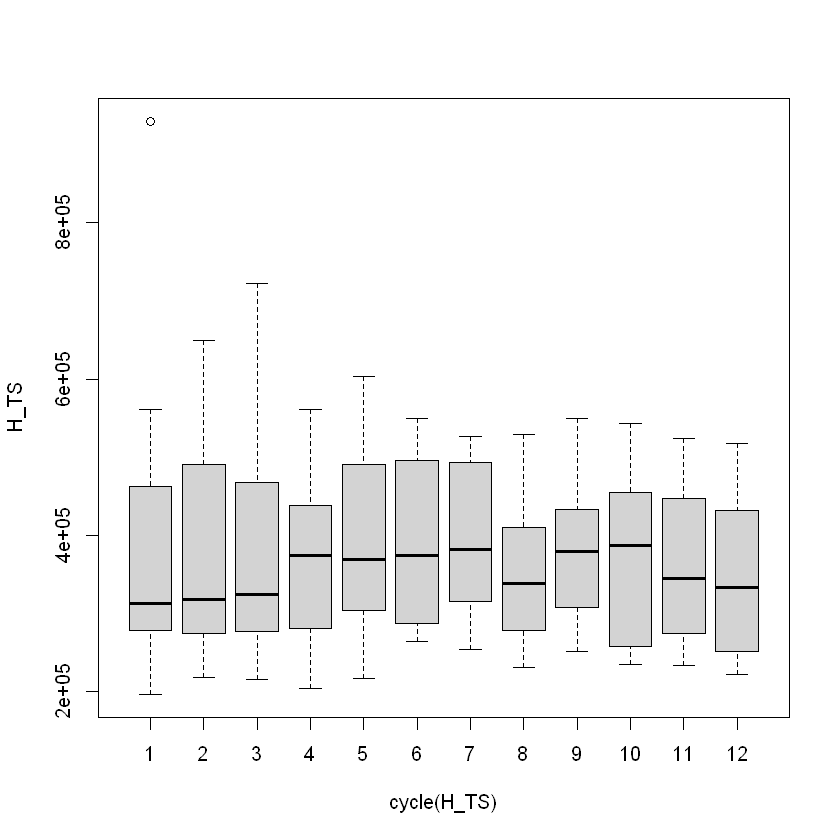

In [12]:
#####################################################################
# Letâ™s look in to the seasonal effects

boxplot(H_TS~cycle(H_TS))

#####################################################################

In [13]:
#####################################################################
# Since we want to remove the unequal variances in the data we will take the log of the series
# Before we fit the ARIMA model to our time series, we need to remove the unequal variances in 
# the data by taking the log of the series.

# Also, the original signal had trends and seasonal effects, so it was not stationary.  
# Therefore, we perform a diff of the signal and check if the trends and seasonal effect can be removed. 


library(tseries)

# Now perform the Augmented Dickey-Fuller Test

adf.test(diff(log(H_TS)), alternative="stationary", k=0)

# This will give you the result of the Augmented Dickey-Fuller Test
#####################################################################

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(diff(log(H_TS)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(log(H_TS))
Dickey-Fuller = -25.084, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


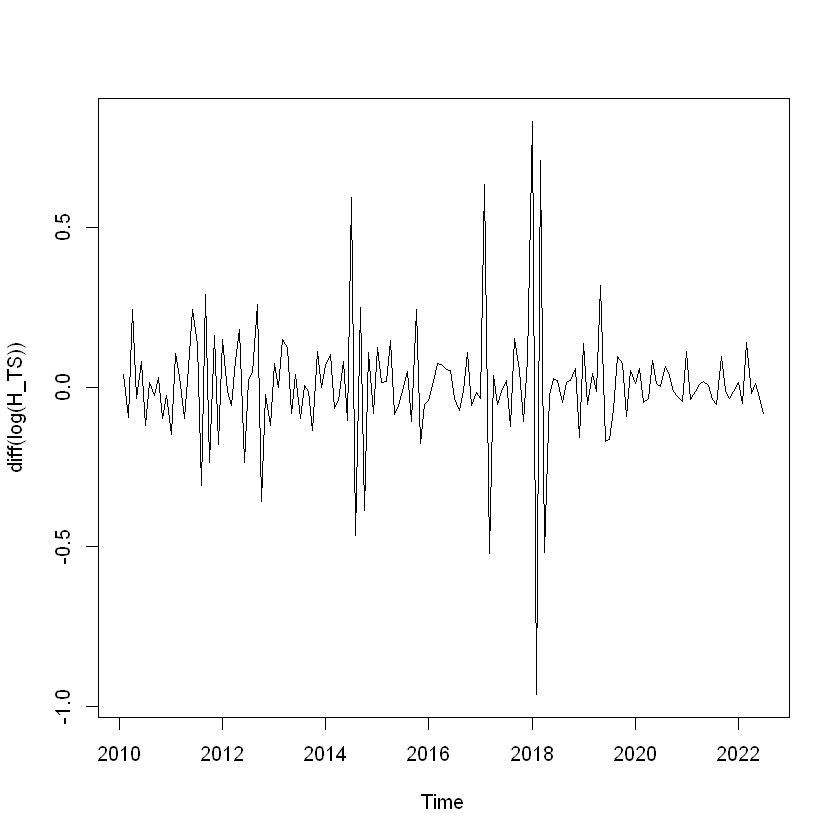

In [14]:
#####################################################################
# Let us now plot the series

plot(diff(log(H_TS)))

#####################################################################

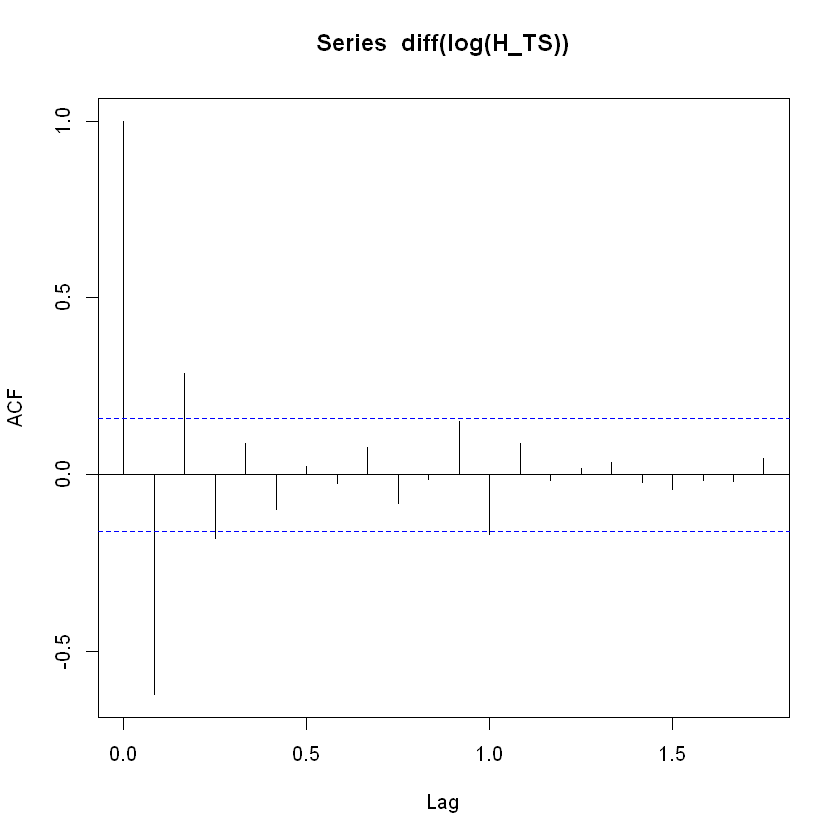

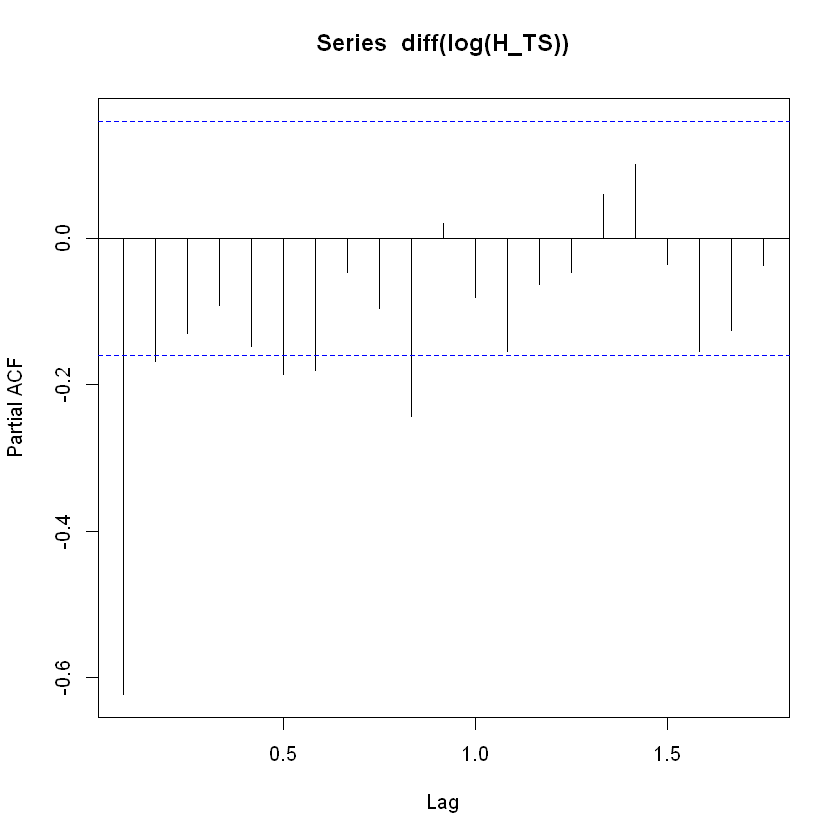

In [15]:
#####################################################################
# Now let us look into the ACF  and PACF charts

acf(diff(log(H_TS)))

pacf(diff(log(H_TS)))

# ARIMA (1,1,2)

#####################################################################

In [16]:
#####################################################################
# Let us now fit the ARIMA(4,1,2)

(fit_open <- arima(log(H_TS), c(4, 1, 2),seasonal = list(order = c(4, 1, 2), period = 12)))

#####################################################################


Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"



Call:
arima(x = log(H_TS), order = c(4, 1, 2), seasonal = list(order = c(4, 1, 2), 
    period = 12))

Coefficients:
         ar1     ar2      ar3      ar4      ma1     ma2     sar1     sar2
      0.7277  0.2802  -0.2511  -0.1562  -1.6523  0.6954  -0.7238  -0.1265
s.e.     NaN  0.0865   0.1208   0.0353   0.0622  0.0650   0.0797      NaN
        sar3    sar4     sma1     sma2
      0.1621  0.1172  -0.4630  -0.5369
s.e.     NaN     NaN   0.2117   0.1710

sigma^2 estimated as 0.01658:  log likelihood = 69.67,  aic = -113.34

In [17]:
#####################################################################
# Let us now fit the ARIMA(1,1,2)

(fit_open <- arima(log(H_TS), c(1, 1, 2),seasonal = list(order = c(1, 1, 2), period = 12)))

#####################################################################



Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
          ar1      ma1      ma2    sar1     sma1    sma2
      -0.7769  -0.2123  -0.6235  0.0121  -0.9817  0.1557
s.e.   0.1863   0.2070   0.1979  0.3901   0.3765  0.3421

sigma^2 estimated as 0.02116:  log likelihood = 61.22,  aic = -108.44

In [18]:
#####################################################################
# Let us now fit the ARIMA(2,1,2)

(fit_open <- arima(log(H_TS), c(2, 1, 2),seasonal = list(order = c(2, 1, 2), period = 12)))

#####################################################################



Call:
arima(x = log(H_TS), order = c(2, 1, 2), seasonal = list(order = c(2, 1, 2), 
    period = 12))

Coefficients:
         ar1     ar2      ma1      ma2     sar1     sar2     sma1     sma2
      0.0046  0.3027  -0.9399  -0.0601  -0.8551  -0.2130  -0.1497  -0.5254
s.e.  0.2324  0.0833   0.2729   0.2391   0.5854   0.1101   0.5897   0.5447

sigma^2 estimated as 0.01874:  log likelihood = 66.31,  aic = -114.62

In [19]:
install.packages("forecast") 
library(forecast) 


#####################################################################
# Now let us do some prediction for the next 7 years

# Monthly Average Sale Price
pred_H_TS <- predict(fit_open, n.ahead = 7*12)

pred_H_TS

pred_H_TS$pred2 <- 2.71828^(pred_H_TS$pred)

pred_H_TS


# Calculate mean and standard deviation of the prediction
Avg.vF <- mean(pred_H_TS$pred2)
Avg.vF

StandD <- sd(pred_H_TS$pred2)
StandD

################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\forecast\libs\x64\forecast.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\forecast\libs\x64\forecast.dll: Permission denied"
Warning message:
"restored 'forecast'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpWOUmFc\downloaded_packages


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,13.18083,13.24197,13.27383,13.23095,13.21893
2023,13.37358,13.30689,13.36209,13.31035,13.36468,13.35165,13.36430,13.31188,13.38078,13.36244,13.33990,13.29679
2024,13.41430,13.38978,13.41664,13.39620,13.45093,13.42548,13.40707,13.35662,13.43439,13.43165,13.39567,13.37328
2025,13.49354,13.43436,13.50366,13.46250,13.50773,13.48869,13.47661,13.44546,13.51400,13.50860,13.47978,13.44630
2026,13.57211,13.53358,13.57263,13.54252,13.59579,13.57391,13.56304,13.51497,13.58951,13.58306,13.55098,13.52257
2027,13.64305,13.59424,13.65012,13.61498,13.66340,13.64257,13.62932,13.59161,13.66298,13.65800,13.62719,13.59680
2028,13.72066,13.67624,13.72417,13.69098,13.74183,13.72071,13.70923,13.66627,13.73907,13.73306,13.70186,13.67208
2029,13.79419,13.74821,13.79935,13.76556,13.81536,13.79427,13.78178,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1380570,0.1384783,0.1452698,0.1453711,0.1461686


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,13.18083,13.24197,13.27383,13.23095,13.21893
2023,13.37358,13.30689,13.36209,13.31035,13.36468,13.35165,13.36430,13.31188,13.38078,13.36244,13.33990,13.29679
2024,13.41430,13.38978,13.41664,13.39620,13.45093,13.42548,13.40707,13.35662,13.43439,13.43165,13.39567,13.37328
2025,13.49354,13.43436,13.50366,13.46250,13.50773,13.48869,13.47661,13.44546,13.51400,13.50860,13.47978,13.44630
2026,13.57211,13.53358,13.57263,13.54252,13.59579,13.57391,13.56304,13.51497,13.58951,13.58306,13.55098,13.52257
2027,13.64305,13.59424,13.65012,13.61498,13.66340,13.64257,13.62932,13.59161,13.66298,13.65800,13.62719,13.59680
2028,13.72066,13.67624,13.72417,13.69098,13.74183,13.72071,13.70923,13.66627,13.73907,13.73306,13.70186,13.67208
2029,13.79419,13.74821,13.79935,13.76556,13.81536,13.79427,13.78178,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1380570,0.1384783,0.1452698,0.1453711,0.1461686


[1] 758232.1

[1] 120047.6

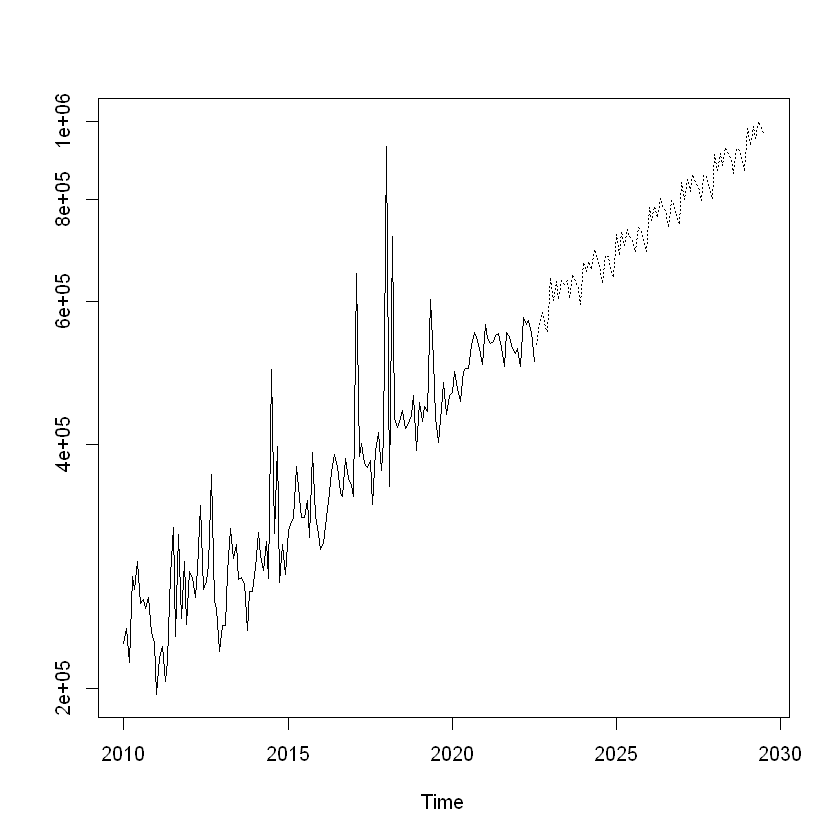

In [20]:
################################################################################

ts.plot(H_TS,2.71828^pred_H_TS$pred, log = "y", lty = c(1,3))

################################################################################

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Aug 2022       554825.8 470499.7 639151.8 425860.2 683791.4
Sep 2022       557051.4 472623.7 641479.2 427930.3 686172.6
Oct 2022       559277.1 474747.7 643806.5 430000.6 688553.7
Nov 2022       561502.8 476871.9 646133.7 432071.0 690934.6
Dec 2022       563728.5 478996.2 648460.7 434141.7 693315.3
Jan 2023       565954.1 481120.6 650787.6 436212.5 695695.8
Feb 2023       568179.8 483245.2 653114.4 438283.5 698076.1
Mar 2023       570405.5 485369.8 655441.1 440354.7 700456.2
Apr 2023       572631.1 487494.6 657767.6 442426.1 702836.2
May 2023       574856.8 489619.5 660094.1 444497.6 705216.0
Jun 2023       577082.5 491744.5 662420.4 446569.4 707595.5
Jul 2023       579308.1 493869.7 664746.6 448641.3 709975.0
Aug 2023       581533.8 495994.9 667072.7 450713.4 712354.2
Sep 2023       583759.5 498120.3 669398.6 452785.7 714733.2
Oct 2023       585985.1 500245.8 671724.5 454858.2 717112.1
Nov 2023       588210.8 502371.4 674050.

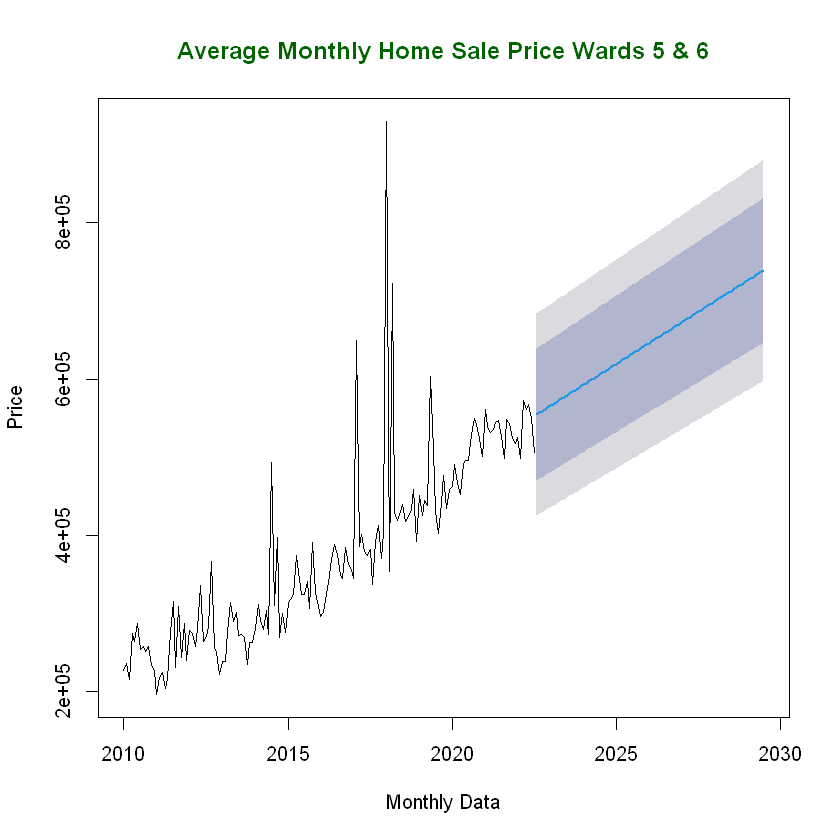

In [21]:
################################Using auto.arima################################
################################################################################

# forecasting model using arima model
fit <- auto.arima(H_TS)

# Next 84 forecasted values
forecast(fit, 84)

# plotting the graph with next
# 84 monthly forecasted values
plot(forecast(fit, 84), xlab ="Monthly Data",
     ylab ="Price",
     main ="Average Monthly Home Sale Price Wards 5 & 6", col.main ="darkgreen")

################################################################################
